In [1]:
import pandas as pd
import geopandas as gpd

# Load CSV data
developments_df = pd.read_csv('../data/landing/development-activity-monitor.csv')

# Load the shapefile
developments_shp = gpd.read_file('../data/landing/development-activity-monitor/development-activity-monitor.shp')


In [23]:
# Inspect the first few rows of the CSV
print(developments_df.head())

# Inspect the first few rows of the shapefile
print(developments_shp.head())


   data_format development_key     status  year_completed  clue_small_area  \
0  Post May 16        X0009411  COMPLETED          2023.0        Docklands   
1  Post May 16        X0007400  COMPLETED          2023.0  Melbourne (CBD)   
2  Post May 16        X0009218  COMPLETED          2023.0   East Melbourne   
3  Post May 16        X0004600  COMPLETED          2023.0       Kensington   
4  Post May 16        X0009204  COMPLETED          2023.0  Melbourne (CBD)   

   clue_block                                     street_address  property_id  \
0        1110  The District Docklands East Car Park 82 Waterf...       593729   
1          84         293-299 La Trobe Street MELBOURNE VIC 3000       105449   
2         621          200 Victoria Parade, East Melbourne, 3002       109658   
3         513            413-427 Macaulay Road, Kensington, 3031       106309   
4          72          263-267 William Street MELBOURNE VIC 3000       110106   

   property_id_2  property_id_3  ...  hospit

In [16]:
developments_shp.info()
developments_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   data_format  1443 non-null   object  
 1   development  1443 non-null   object  
 2   status       1443 non-null   object  
 3   year_comple  1043 non-null   object  
 4   clue_small_  1443 non-null   object  
 5   clue_block   1443 non-null   object  
 6   street_addr  1443 non-null   object  
 7   property_id  3 non-null      object  
 8   property_id  3 non-null      object  
 9   property_id  3 non-null      object  
 10  property_id  3 non-null      object  
 11  property_id  3 non-null      object  
 12  floors_abov  1443 non-null   object  
 13  resi_dwelli  1443 non-null   object  
 14  studio_dwe   1443 non-null   object  
 15  one_bdrm_dw  1443 non-null   object  
 16  two_bdrm_dw  1443 non-null   object  
 17  three_bdrm_  1443 non-null   object  
 18  student_apa  1443 no

In [18]:
# Merge the CSV data with the shapefile based on a common key (e.g., 'development_key')
developments_shp['street_address'] = developments_shp['street_addr'].str.strip().str.lower()
developments_gdf = developments_shp.merge(developments_df, on='street_address')


In [20]:
# Filter developments that are expected to be completed within the next 5 years
future_developments_gdf = developments_gdf[developments_gdf['year_completed'] <= 2029]

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
developments_shp = gpd.read_file('../data/landing/development-activity-monitor/development-activity-monitor.shp')

# Ensure the GeoDataFrame is in the correct coordinate system (WGS 84)
developments_shp = developments_shp.to_crs(epsg=4326)  # WGS 84



In [10]:
import folium

# Initialize the map centered on a specific location, e.g., Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12, control_scale=True)

# Merge the CSV data with the shapefile based on a common key (e.g., 'development_key')
developments_shp['street_address'] = developments_shp['street_addr'].str.strip().str.lower()

# Add a point for each development
for _, row in developments_shp.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],  # Extract latitude and longitude
        popup=f"Property ID: {row['property_id']}\nAddress: {row['street_address']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save or display the map
m.save('future_developments_map.html')


In [12]:
print(developments_shp.count())

data_format       1443
development       1443
status            1443
year_comple       1043
clue_small_       1443
clue_block        1443
street_addr       1443
property_id          3
property_id          3
property_id          3
property_id          3
property_id          3
floors_abov       1443
resi_dwelli       1443
studio_dwe        1443
one_bdrm_dw       1443
two_bdrm_dw       1443
three_bdrm_       1443
student_apa       1443
student_bed       1443
student_acc       1443
institution       1443
hotel_rooms       1443
serviced_ap       1443
hotels_serv       1443
hostel_beds       1443
childcare_p       1443
office_flr        1443
retail_flr        1443
industrial_       1443
storage_flr       1443
education_f       1443
hospital_fl       1443
recreation_       1443
publicdispa       1443
community_f       1443
car_spaces        1443
bike_spaces       1443
town_planni       1443
longitude         1443
latitude          1443
geometry          1443
street_address    1443
dtype: int6

In [21]:
m

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'year_completed' column to numeric, handling errors
developments_shp['year_comple'] = pd.to_numeric(developments_shp['year_comple'], errors='coerce')

# Filter developments for the years 2022-2028
filtered_developments = developments_shp[(developments_shp['year_comple'] >= 2020) & (developments_shp['year_comple'] <= 2028)]


In [23]:
print(filtered_developments.count())

data_format       159
development       159
status            159
year_comple       159
clue_small_       159
clue_block        159
street_addr       159
property_id         0
property_id         0
property_id         0
property_id         0
property_id         0
floors_abov       159
resi_dwelli       159
studio_dwe        159
one_bdrm_dw       159
two_bdrm_dw       159
three_bdrm_       159
student_apa       159
student_bed       159
student_acc       159
institution       159
hotel_rooms       159
serviced_ap       159
hotels_serv       159
hostel_beds       159
childcare_p       159
office_flr        159
retail_flr        159
industrial_       159
storage_flr       159
education_f       159
hospital_fl       159
recreation_       159
publicdispa       159
community_f       159
car_spaces        159
bike_spaces       159
town_planni       159
longitude         159
latitude          159
geometry          159
street_address    159
dtype: int64


In [27]:
import folium

# Initialize the map centered on Melbourne
m1 = folium.Map(location=[-37.8136, 144.9631], zoom_start=12, control_scale=True)

# Add a point for each development
for _, row in filtered_developments.iterrows():
    # Ensure that the geometry is a Point and extract coordinates
    if row.geometry.geom_type == 'Point':
        lat, lon = row.geometry.y, row.geometry.x
        folium.Marker(
            location=[lat, lon],  # Use the correct order: [latitude, longitude]
            popup=f"Property ID: {row['property_id']}\nAddress: {row['street_address']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(m1)

# Save or display the map
m1.save('future_developments_map.html')

m1

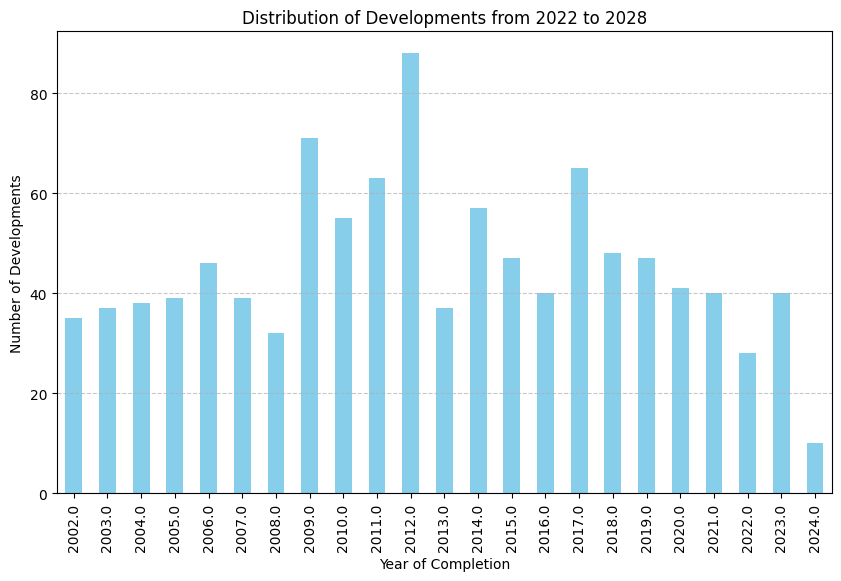

In [25]:
# Group the data by 'year_completed' and count the number of developments each year
yearly_developments = developments_shp['year_comple'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
yearly_developments.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Year of Completion')
plt.ylabel('Number of Developments')
plt.title('Distribution of Developments from 2022 to 2028')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


<Figure size 1000x1000 with 0 Axes>

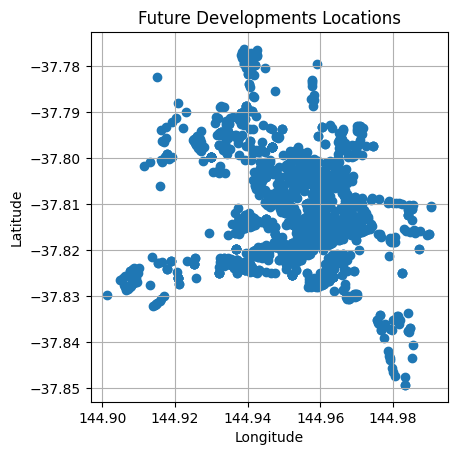

In [3]:
# Plot the future developments
plt.figure(figsize=(10, 10))
developments_shp.plot()
plt.title('Future Developments Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show the plot
plt.show()


AttributeError: Stamen

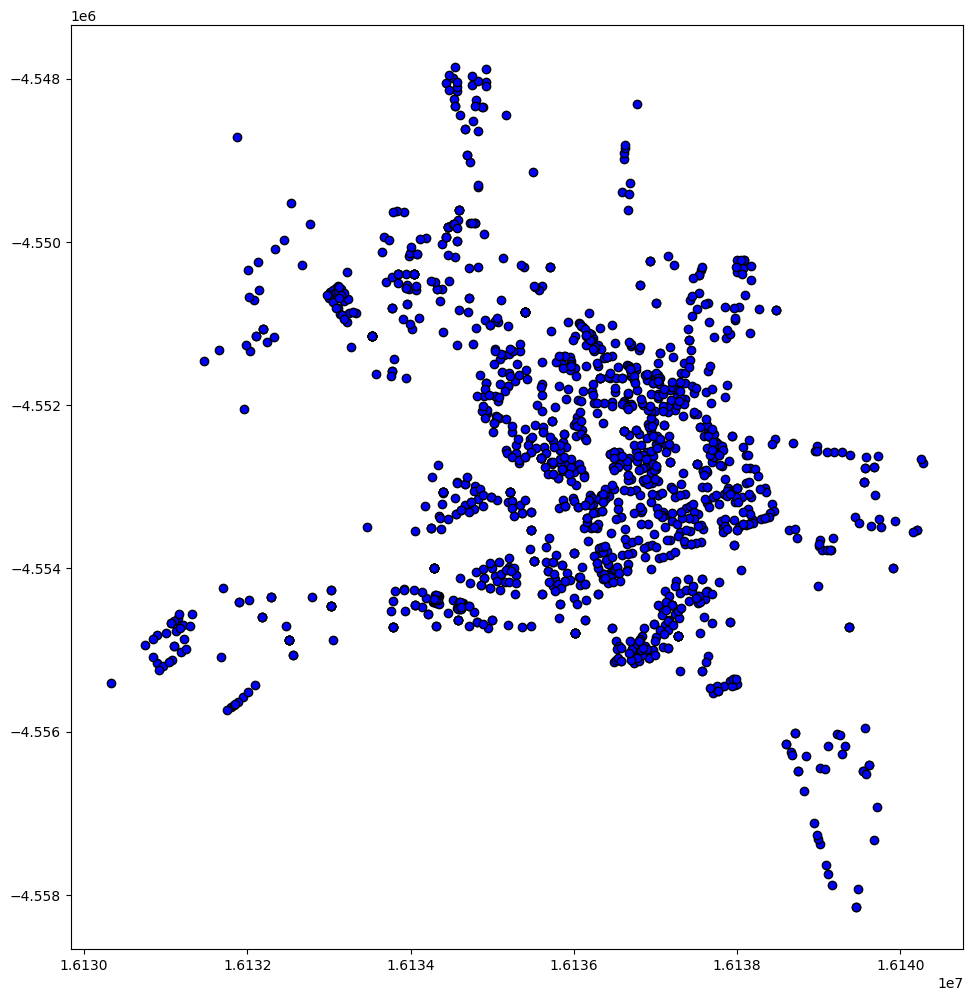

In [5]:
import contextily as ctx

# Convert the GeoDataFrame to Web Mercator (EPSG:3857) for basemap overlay
developments_shp = developments_shp.to_crs(epsg=3857)

# Plot with a basemap
fig, ax = plt.subplots(figsize=(12, 12))
developments_shp.plot(ax=ax, color='blue', edgecolor='black')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Add title and labels
ax.set_title('Future Developments with Basemap', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.show()
